In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['parental level of education'].unique())
print(df['race/ethnicity'].unique())
print(df['test preparation course'].unique())




['female' 'male']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['none' 'completed']


In [11]:
#define numerical and categorical feature
numerical_fetaure= [feature for feature in df.columns if df[feature].dtype!='O']

categorical_feature= [feature for feature in df.columns if df[feature].dtype =='O']

print('we have {} numerical feature : {}' .format(len(numerical_fetaure),numerical_fetaure))
print('\nwe have {} categorical feature : {}' .format(len(categorical_feature),categorical_feature))

we have 3 numerical feature : ['math score', 'reading score', 'writing score']

we have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'Number of reading full score: {reading_full}')
print(f'Number of writing full score: {writing_full}')
print(f'Number of math full score: {math_full}')

Number of reading full score: 17
Number of writing full score: 14
Number of math full score: 7


In [14]:
reading_less_20=df[df['reading score'] <=20]['average'].count()
writing_less_20=df[df['writing score'] <=20]['average'].count()
math_less_20=df[df['math score'] <=20]['average'].count()

print(f'the number of student with less than 20 in reading : {reading_less_20}')
print(f'the number of student with less than 20 in writing : {writing_less_20}')
print(f'the number of student with less than 20 in math : {math_less_20}')

the number of student with less than 20 in reading : 1
the number of student with less than 20 in writing : 3
the number of student with less than 20 in math : 4


In [15]:
#Visulization 

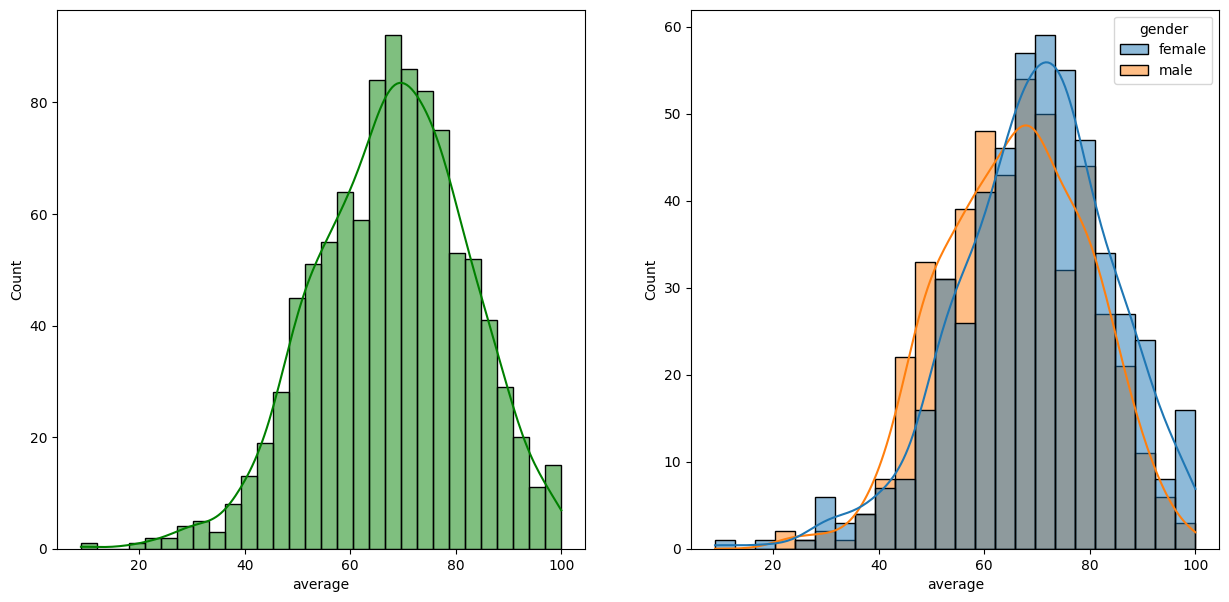

In [16]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

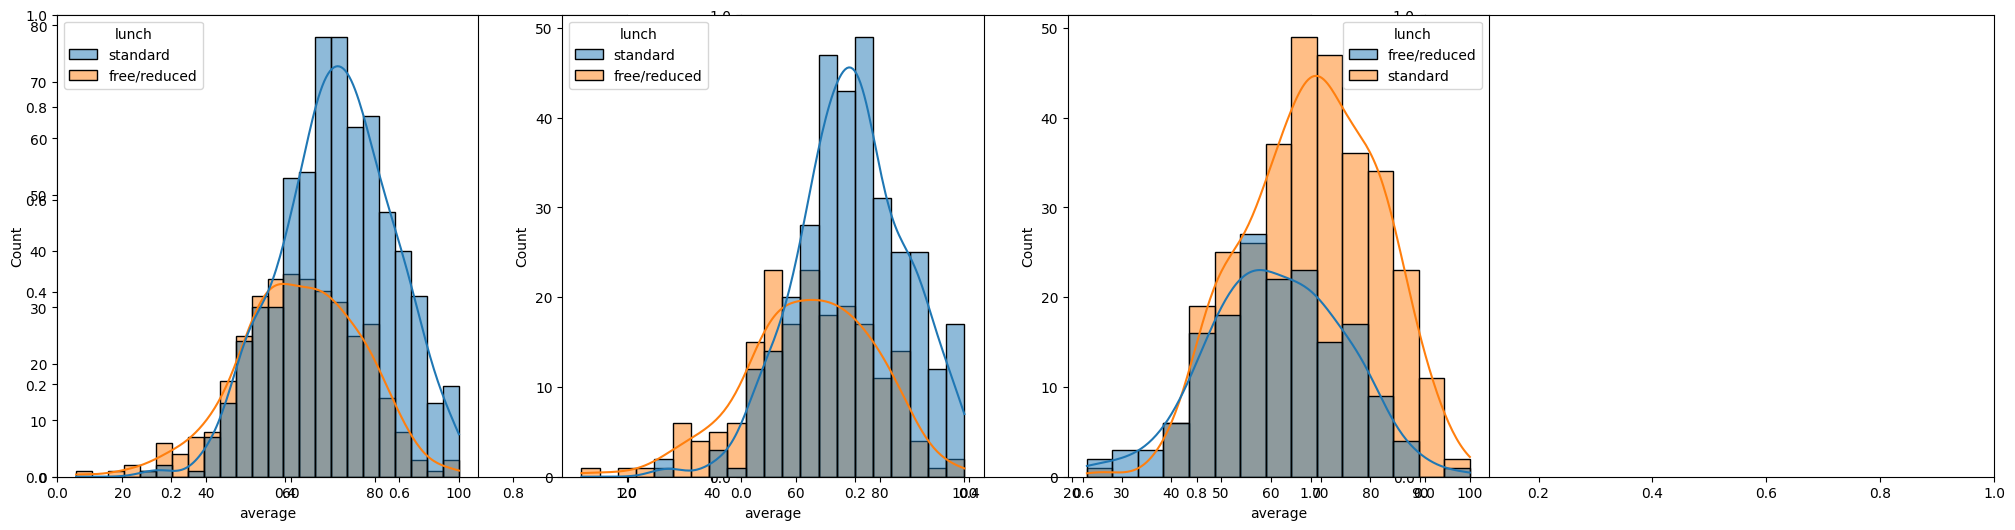

In [17]:
fig, axs=plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'] ,x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

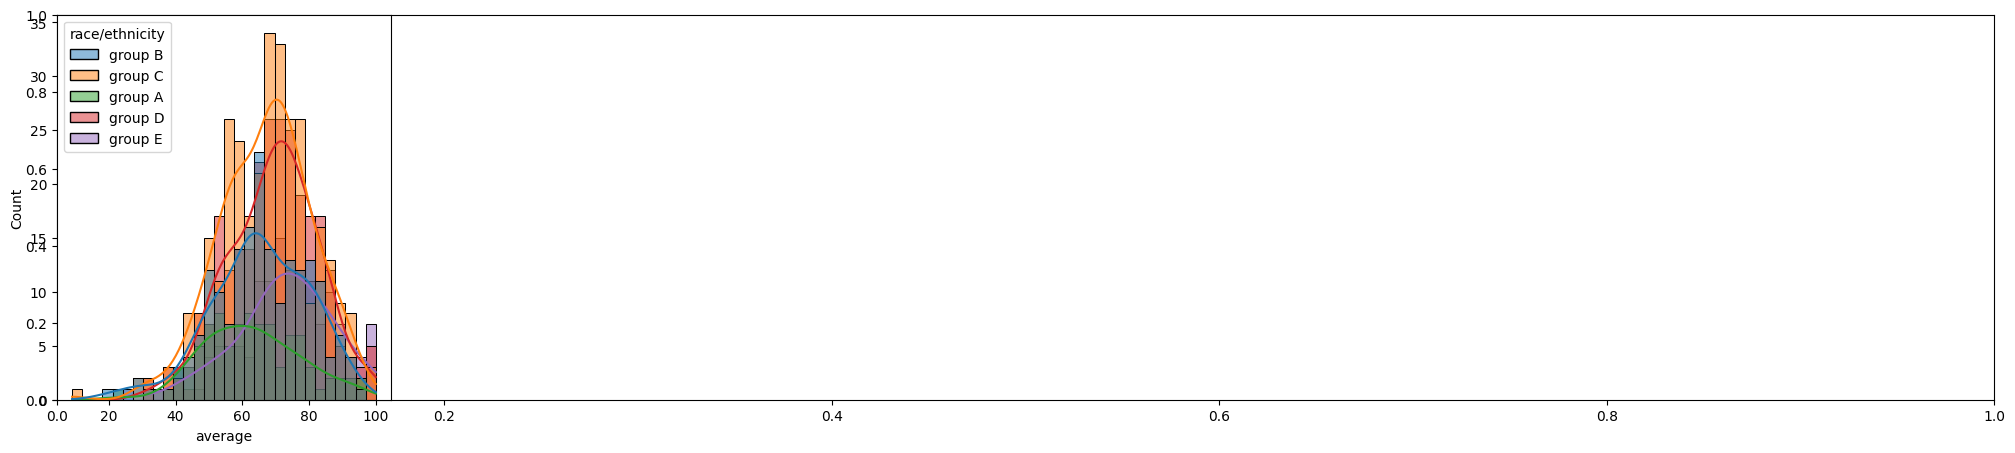

In [18]:
fig, axs = plt.subplots(figsize=(25,5))
plt.subplot(151)
sns.histplot(data=df,x='average', bins=30,kde=True,hue='race/ethnicity')
plt.show()

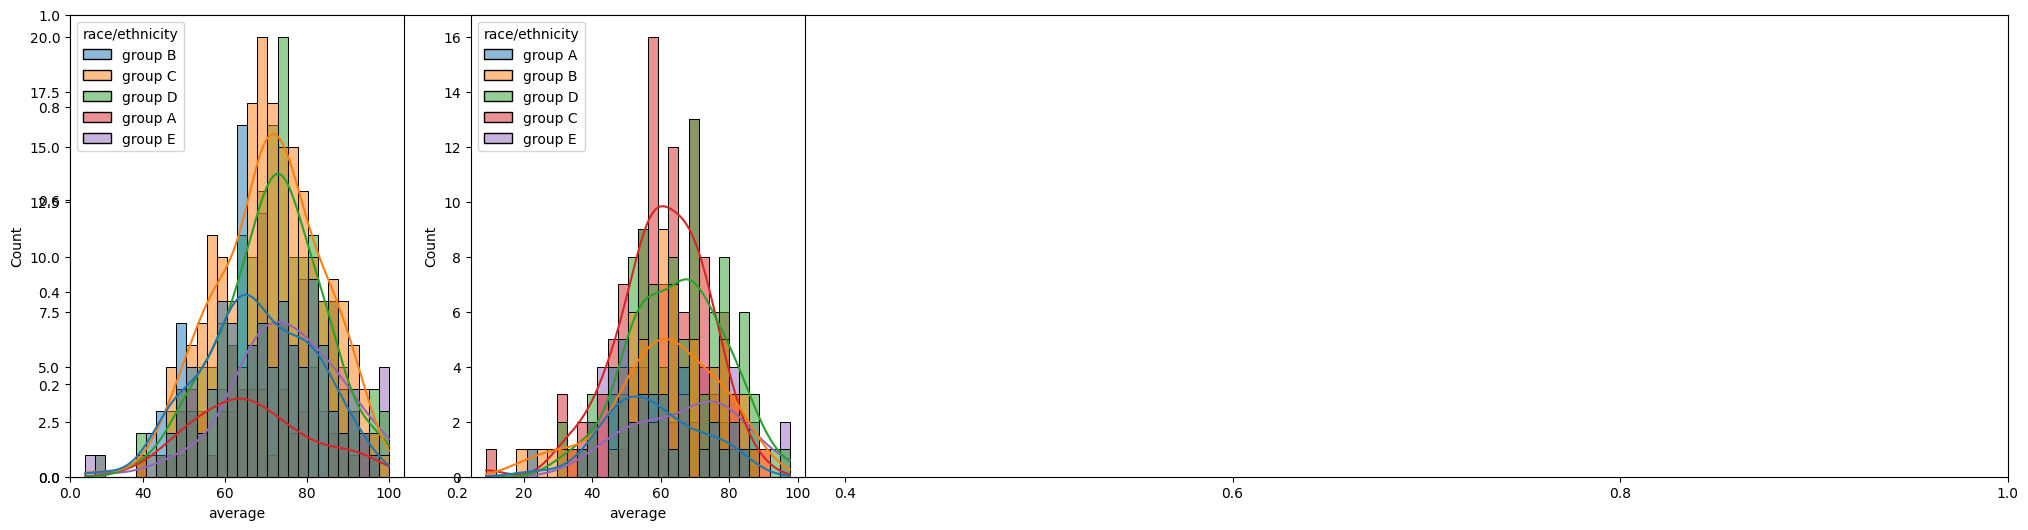

In [19]:
fig, axs = plt.subplots( figsize=(25,6))
plt.subplot(151)
sns.histplot(data=df[df.lunch == 'standard'],x='average', bins=30,kde=True,hue='race/ethnicity')
plt.subplot(152)
sns.histplot(data=df[df.lunch == 'free/reduced'],x='average',bins=30,kde=True,hue='race/ethnicity')
plt.show()


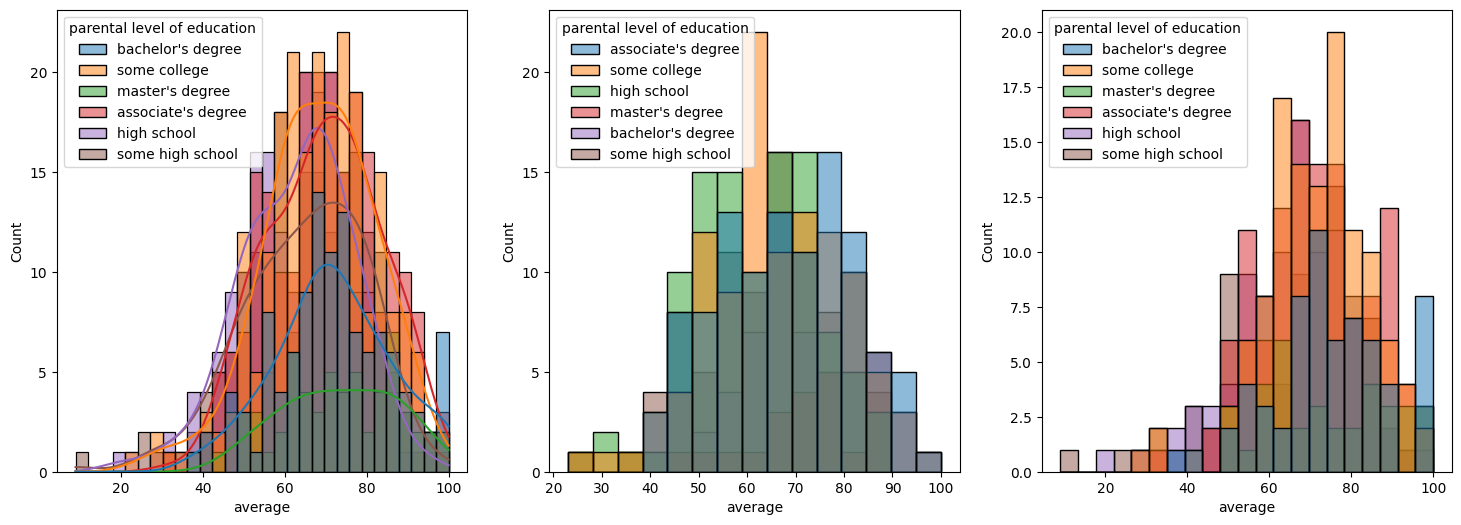

In [20]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
sns.histplot(data=df, x='average',kde=True,bins=30,hue='parental level of education')

plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', hue='parental level of education' )

plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',hue='parental level of education')
plt.show()


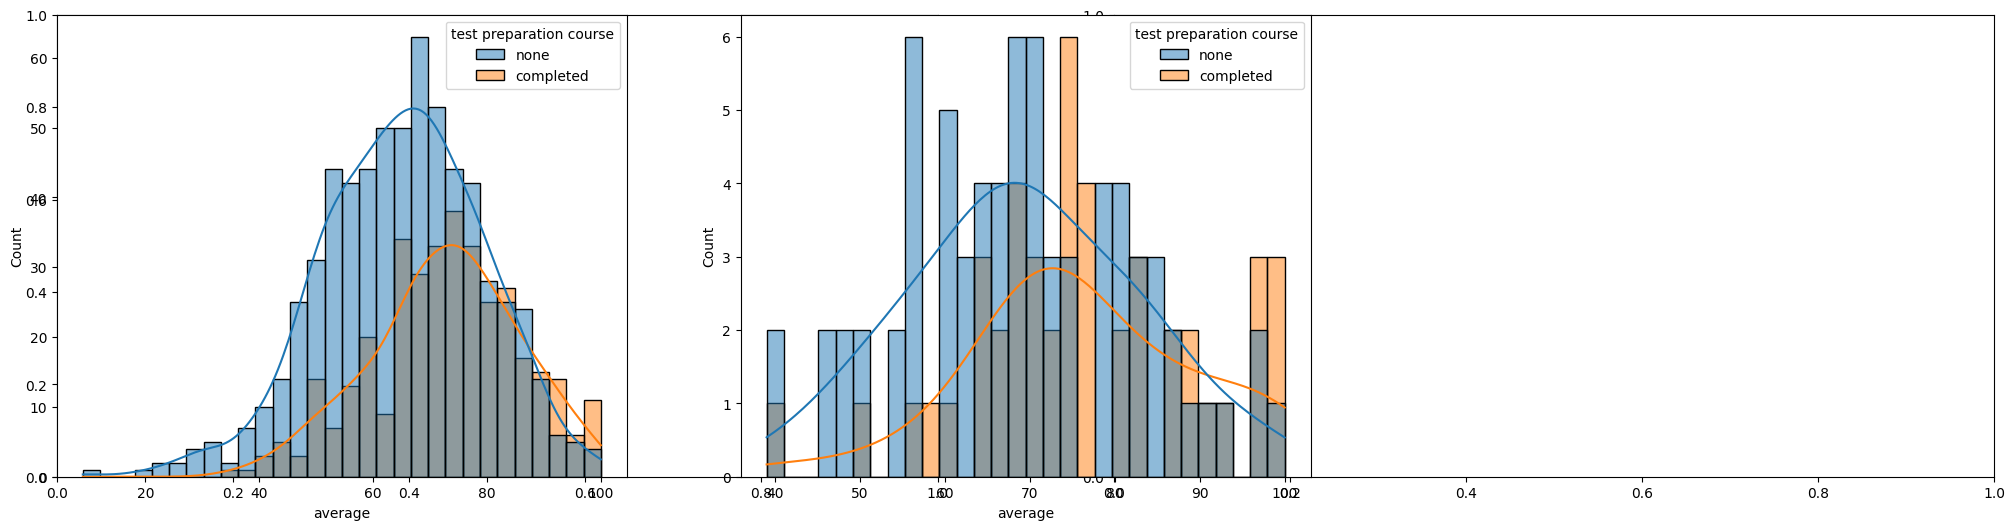

In [21]:
fig, axs = plt.subplots(1,2, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True,bins=30,hue='test preparation course')
plt.subplot(132)
sns.histplot(data=df[df['parental level of education']=="bachelor's degree"],x='average', kde=True,bins=30, hue='test preparation course')
plt.show()